# Optimizing Hyperparameters - CNN Model

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
from math import floor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [2]:
# Set a path

path = r'/Users/roxanamiu/Documents/Climate Change project 2'

In [3]:
# Import cleaned weather observations data

X = pd.read_csv(os.path.join(path, 'Prepared', 'X_cleaned_date.csv'), index_col = False)

In [4]:
# Import predictions data

answers = pd.read_csv(os.path.join(path, 'Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [5]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_cloud_cover,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_pressure,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3,8,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.0260,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,1.018,0.20,0.10,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,0.84,1.0172,0.25,0.00,0.0,2.9,2.2,4.4,4,0.67,1.017,0.18,0.31,0.0,2.3,1.4,3.1,8,0.90,1.0056,0.14,0.06,0.1,7.7,6.4,8.3,8,0.89,1.0161,0.18,0.66,0.5,8.2,7.4,11.0,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6,8,0.86,1.0086,0.12,0.27,0.0,7.7,6.8,9.1,6,0.94,1.0173,0.56,0.13,3.2,2.1,-1.3,5.5,8,0.92,1.0062,0.17,1.34,0.4,8.6,7.5,9.9,7,0.86,1.0254,0.46,0.0,0.9,9.8,7.4,12.2,6,0.72,1.018,0.61,0.30,5.1,6.2,4.2,10.2,8,0.62,1.0139,0.04,0.00,0.0,3.4,2.8,4.9,6,0.97,1.0292,0.21,0.61,0.0,-9.5,-10.5,-8.5,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,0.77,1.0179,0.67,0.00,3.5,3.1,-0.5,6.4,4,0.67,1.017,0.30,0

In [6]:
X.shape

(22950, 137)

In [7]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
answers.shape

(22950, 16)

# Data Wrangling

In [9]:
# Drop unnecessary columns

X.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [10]:
X.shape # observations dataset has the correct shape

(22950, 135)

In [11]:
answers.drop(columns = 'DATE', inplace = True)

In [12]:
answers.shape # predictions dataset has the correct shape

(22950, 15)

# Reshaping for Modeling

In [13]:
# Turn X and answers from a df to arrays

X = np.array(X)
y = np.array(answers)

In [14]:
X.shape

(22950, 135)

In [15]:
X = X.reshape(-1,15,9) #X has the form (22950, 15, 9)

In [16]:
# Verify shape

X.shape

(22950, 15, 9)

In [17]:
# Use argmax to transform y

y =  np.argmax(y, axis = 1)
y

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
y.shape #y has the right form

(22950,)

In [19]:
# Check y layout

from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'multiclass'

#### The Bayesian optimization function only accepts y data in “multiclass” and “binary” layouts but not in “multilabel-indicator.”

# Data Split 

In [20]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 15, 9) (17212,)
(5738, 15, 9) (5738,)


# Bayesian Hyperparameter Optimization

In [22]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15 # Number of weather stations
# Make scorer accuracy
score_acc = make_scorer(accuracy_score)

In [23]:
# Create function

def bay_area(neurons, activation, kernel, optimizer, learning_rate, batch_size, epochs,
              layers1, layers2, normalization, dropout, dropout_rate): 
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    #optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 #'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 #'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 #'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    
    neurons = round(neurons)
    kernel = round(kernel)
    activation = activationL[round(activation)]  #optimizerD[optimizerL[round(optimizer)]]
    optimizer = optimizerL[round(optimizer)]
    batch_size = round(batch_size)
    
    epochs = round(epochs)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    def cnn_model():
        model = Sequential()
        model.add(Conv1D(neurons, kernel_size=kernel,activation=activation, input_shape=(timesteps, input_dim)))
        #model.add(Conv1D(32, kernel_size=1,activation='relu', input_shape=(timesteps, input_dim)))
        
        if normalization > 0.5:
            model.add(BatchNormalization())
        for i in range(layers1):
            model.add(Dense(neurons, activation=activation)) #(neurons, activation=activation))
        if dropout > 0.5:
            model.add(Dropout(dropout_rate, seed=123))
        for i in range(layers2):
            model.add(Dense(neurons, activation=activation))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(n_classes, activation='softmax')) #sigmoid softmax
        #model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) #categorical_crossentropy
        model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) #categorical_crossentropy
        return model
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=2, patience=20)
    nn = KerasClassifier(build_fn=cnn_model, epochs=epochs, batch_size=batch_size, verbose=2)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

In [24]:
start = time.time() 
params ={ 
    'neurons': (10, 100),
    'kernel': (1, 3),
    'activation':(0, 9),
    'optimizer':(0,7),
    'learning_rate':(0.001, 1),
    'batch_size': (100, 300),
    'epochs':(10, 40),
    'layers1':(1,2),
    'layers2':(1,2),
    'normalization':(0,1),
    'dropout':(0,1),
    'dropout_rate':(0.3,0.5)}
# Run Bayesian Optimization 
nn_opt = BayesianOptimization(bay_area, params, random_state=42)
nn_opt.maximize(init_points=15, n_iter=4) 
print('Search took %s minutes' % ((time.time() - start)/60))


|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  kernel   |  layers1  |  layers2  | learni... |  neurons  | normal... | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/15
48/48 - 1s - 23ms/step - accuracy: 0.6322 - loss: 2.7003
Epoch 2/15
48/48 - 1s - 11ms/step - accuracy: 0.6440 - loss: 2.6908
Epoch 3/15
48/48 - 1s - 11ms/step - accuracy: 0.6440 - loss: 2.6840
Epoch 4/15
48/48 - 1s - 11ms/step - accuracy: 0.6440 - loss: 2.6781
Epoch 5/15
48/48 - 1s - 11ms/step - accuracy: 0.6440 - loss: 2.6728
Epoch 6/15
48/48 - 1s - 11ms/step - accuracy: 0.6440 - loss: 2.6675
Epoch 7/15
48/48 - 1s - 11ms/step - accuracy: 0.6440 - loss: 2.6621
Epoch 8/15
48/48 - 1s - 11ms/step - accuracy: 0.6440 - loss: 2.6563
Epoch 9/15
48/48 - 1s - 11ms/step - accuracy: 0.6440 - loss: 2.6497
Epoch 10/15
48/48 - 1s - 12ms/step - accuracy: 0

ValueError: Input y contains NaN.

In [25]:
optimum = nn_opt.max['params']
learning_rate = optimum['learning_rate']

activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu', 'elu', 'exponential', LeakyReLU, 'relu']
optimum['activation'] = activationL[round(optimum['activation'])]

optimum['batch_size'] = round(optimum['batch_size'])
optimum['epochs'] = round(optimum['epochs'])
optimum['layers1'] = round(optimum['layers1'])
optimum['layers2'] = round(optimum['layers2'])
optimum['neurons'] = round(optimum['neurons'])

optimizerL = ['Adam', 'SGD', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl', 'Adam']
optimizerD = {
    'Adam': Adam(learning_rate=learning_rate),
    'SGD': SGD(learning_rate=learning_rate),
    'RMSprop': RMSprop(learning_rate=learning_rate),
    'Adadelta': Adadelta(learning_rate=learning_rate),
    'Adagrad': Adagrad(learning_rate=learning_rate),
    'Adamax': Adamax(learning_rate=learning_rate),
    'Nadam': Nadam(learning_rate=learning_rate),
    'Ftrl': Ftrl(learning_rate=learning_rate)
}
optimum['optimizer'] = optimizerD[optimizerL[round(optimum['optimizer'])]]
optimum

{'activation': 'softsign',
 'batch_size': 165,
 'dropout': 0.7296061783380641,
 'dropout_rate': 0.4275114942710426,
 'epochs': 37,
 'kernel': 1.9444298503238986,
 'layers1': 1,
 'layers2': 2,
 'learning_rate': 0.7610242635682806,
 'neurons': 61,
 'normalization': 0.770967179954561,
 'optimizer': <keras.src.optimizers.adadelta.Adadelta at 0x163581790>}

# Running CNN with Optimized Search Parameters

In [26]:
# Set the model with optimized hyperparameters

epochs = 37
batch_size = 165

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = 15

layers1 = 1
layers2 = 2
activation = 'softsign'
kernel = int(round(1.9444298503238986))  # Rounded kernel size for Conv1D
neurons = 61
normalization = 0.770967179954561
dropout = 0.7296061783380641
dropout_rate = 0.4275114942710426
optimizer = Adadelta(learning_rate=0.7610242635682806)  # Instantiate RMSprop with learning rate

model = Sequential()
model.add(Conv1D(neurons, kernel_size=kernel, activation=activation, input_shape=(timesteps, input_dim)))

if normalization > 0.5:
    model.add(BatchNormalization())

for i in range(layers1):
    model.add(Dense(neurons, activation=activation))

if dropout > 0.5:
    model.add(Dropout(dropout_rate))

for i in range(layers2):
    model.add(Dense(neurons, activation=activation))

model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax')) 

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_75 (Conv1D)              │ (None, 14, 61)         │         1,159 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 14, 61)         │           244 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_310 (Dense)               │ (None, 14, 61)         │         3,782 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 14, 61)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_311 (Dense)               │ (None, 14, 61)         │         3,782 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_312 (Dense)               │ (None, 14, 61)         │         3,782 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_75 (MaxPooling1D) │ (None, 7, 61)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_75 (Flatten)            │ (None, 427)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_313 (Dense)               │ (None, 15)             │         6,420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,169 (74.88 KB)

 Trainable params: 19,047 (74.40 KB)

 Non-trainable params: 122 (488.00 B)

In [28]:
# Put the y_test set back into a one-hot configuration

y_train_one_hot = to_categorical(y_train, num_classes=15)

In [29]:
# Check shapes

print(f'X_train shape: {X_train.shape}')
print(f'y_train_one_hot shape: {y_train_one_hot.shape}')

X_train shape: (17212, 15, 9)
y_train_one_hot shape: (17212, 15)


In [30]:
# Compile the model with categorical_crossentropy

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [31]:
# Fit the model to the data

model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, verbose=2)

Epoch 1/37
105/105 - 1s - 11ms/step - accuracy: 0.6658 - loss: 1.1019
Epoch 2/37
105/105 - 1s - 6ms/step - accuracy: 0.7350 - loss: 0.7896
Epoch 3/37
105/105 - 1s - 6ms/step - accuracy: 0.7587 - loss: 0.7099
Epoch 4/37
105/105 - 1s - 6ms/step - accuracy: 0.7779 - loss: 0.6497
Epoch 5/37
105/105 - 1s - 6ms/step - accuracy: 0.7957 - loss: 0.5925
Epoch 6/37
105/105 - 1s - 6ms/step - accuracy: 0.8099 - loss: 0.5451
Epoch 7/37
105/105 - 1s - 6ms/step - accuracy: 0.8177 - loss: 0.5141
Epoch 8/37
105/105 - 1s - 6ms/step - accuracy: 0.8322 - loss: 0.4809
Epoch 9/37
105/105 - 1s - 6ms/step - accuracy: 0.8416 - loss: 0.4606
Epoch 10/37
105/105 - 1s - 6ms/step - accuracy: 0.8459 - loss: 0.4363
Epoch 11/37
105/105 - 1s - 6ms/step - accuracy: 0.8534 - loss: 0.4200
Epoch 12/37
105/105 - 1s - 6ms/step - accuracy: 0.8633 - loss: 0.3963
Epoch 13/37
105/105 - 1s - 6ms/step - accuracy: 0.8702 - loss: 0.3810
Epoch 14/37
105/105 - 1s - 6ms/step - accuracy: 0.8754 - loss: 0.3662
Epoch 15/37
105/105 - 1s - 6

# Creating Confusion Matrix

In [32]:
# Define list of stations names

stations = {
0: 'BASEL',
1: 'BELGRADE',
2: 'BUDAPEST',
3: 'DEBILT',
4: 'DUSSELDORF',
5: 'HEATHROW',
6: 'KASSEL',
7: 'LJUBLJANA',
8: 'MAASTRICHT',
9: 'MADRID',
10: 'MUNCHENB',
11: 'OSLO',
12: 'SONNBLICK',
13: 'STOCKHOLM',
14: 'VALENTIA'
}

In [33]:
def confusion_matrix(y_true, y_pred, stations):
    # Check if y_true and y_pred are one-hot encoded or already class indices
    if y_true.ndim == 1:
        y_true_labels = y_true
    else:
        y_true_labels = np.argmax(y_true, axis=1)
    
    if y_pred.ndim == 1:
        y_pred_labels = y_pred
    else:
        y_pred_labels = np.argmax(y_pred, axis=1)
        
    # Map numeric labels to activity names
    y_true_series = pd.Series([stations[y] for y in y_true_labels])
    y_pred_series = pd.Series([stations[y] for y in y_pred_labels])
    
    return pd.crosstab(y_true_series, y_pred_series, rownames=['True'], colnames=['Pred'])

In [34]:
y_pred = model.predict(X_test)

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


In [35]:
# Evaluate

print(confusion_matrix(y_test, y_pred, stations))

Pred        BASEL  BELGRADE  BUDAPEST  DEBILT  DUSSELDORF  HEATHROW  KASSEL  \
True                                                                          
BASEL        3582        67         9       3           2         4       0   
BELGRADE      114       965         2       0           0         2       0   
BUDAPEST       20        36       140       4           0         1       0   
DEBILT          8         7        24      40           1         2       0   
DUSSELDORF      5         2         3       1           6         9       0   
HEATHROW        8         3         3       1           2        55       0   
KASSEL          1         2         1       0           0         1       3   
LJUBLJANA       9         2         2       0           0         1       0   
MAASTRICHT      5         0         0       0           0         2       0   
MADRID         52        12        10       0           0         1       1   
MUNCHENB        7         0         0       0       

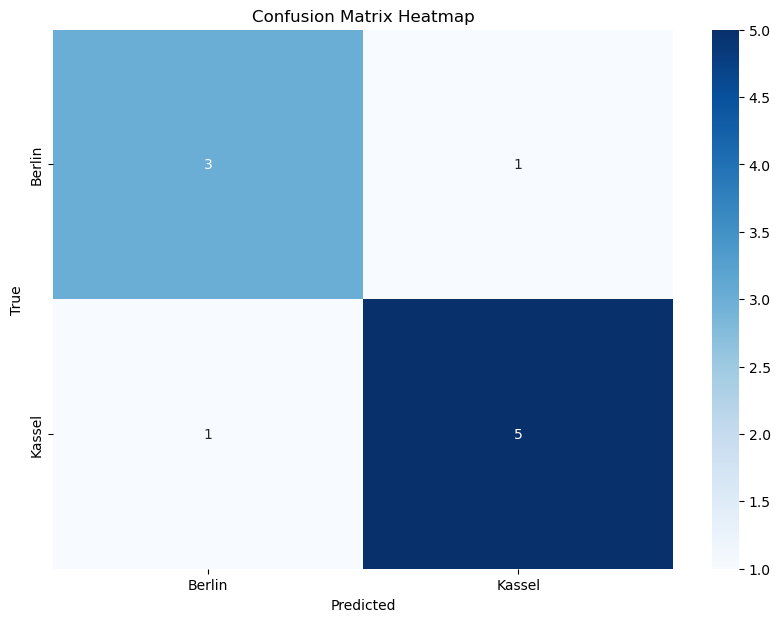

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, stations):
    # Check if y_true and y_pred are one-hot encoded or already class indices
    if y_true.ndim == 1:
        y_true_labels = y_true
    else:
        y_true_labels = np.argmax(y_true, axis=1)
    
    if y_pred.ndim == 1:
        y_pred_labels = y_pred
    else:
        y_pred_labels = np.argmax(y_pred, axis=1)
        
    # Map numeric labels to activity names
    y_true_series = pd.Series([stations[y] for y in y_true_labels])
    y_pred_series = pd.Series([stations[y] for y in y_pred_labels])
    
    # Create the confusion matrix
    cm = pd.crosstab(y_true_series, y_pred_series, rownames=['True'], colnames=['Pred'])
    
    return cm

def plot_confusion_matrix(y_true, y_pred, stations):
    cm = confusion_matrix(y_true, y_pred, stations)
    
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Example usage
y_true = np.array([0, 1, 2, 1, 0, 1, 2, 0, 2, 1])  # Example labels
y_pred = np.array([0, 2, 2, 1, 0, 1, 1, 0, 2, 1])  # Example predictions
stations = ['Kassel', 'Berlin', 'Kassel', 'Kassel', 'Berlin', 'Kassel', 'Berlin', 'Kassel', 'Berlin', 'Berlin']  # Example station data

# Generate the heatmap for all stations
plot_confusion_matrix(y_true, y_pred, stations)
